In [30]:
###
# This code file contains an import of all of the libraries we expect to use in the final project at the top. 
# Unused imports will be removed in the phase 4 submission. 
# Then the dataset is loaded in as a CSV file downloaded from the same directory.
# We summarize the dataset and replace the Class names with 0 and 1 before starting the cleaning process we check for missing values.
# This particular dataset had no missing values so the only step of the cleaning process that changes the dataset is removal of outliers.
# We include data visualizations before and after removing the outliers based off a z score of 3.
###

In [31]:
# Load libraries
# remove unused imports in final project if code is turned in
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import sklearn.metrics as met

In [32]:

# Keicimen = 0
# Besni = 1

# ----BEFORE CLEANING----
names = ['area', 'major', 'minor', 'ecc', 'convex', 'extent', 'perimeter', 'class']
dataset = read_csv('Raisin_Dataset_CSV.csv', header=0, names=names)
# summarize the dataset
print(dataset.describe())

# replace class names with 0 or 1 values for classification
dataset = dataset.replace('Kecimen', 0)
dataset = dataset.replace('Besni', 1)
print(dataset.sample(20))


                area       major       minor         ecc         convex  \
count     900.000000  900.000000  900.000000  900.000000     900.000000   
mean    87804.127778  430.929950  254.488133    0.781542   91186.090000   
std     39002.111390  116.035121   49.988902    0.090318   40769.290132   
min     25387.000000  225.629541  143.710872    0.348730   26139.000000   
25%     59348.000000  345.442898  219.111126    0.741766   61513.250000   
50%     78902.000000  407.803951  247.848409    0.798846   81651.000000   
75%    105028.250000  494.187014  279.888575    0.842571  108375.750000   
max    235047.000000  997.291941  492.275279    0.962124  278217.000000   

           extent    perimeter       class  
count  900.000000   900.000000  900.000000  
mean     0.699508  1165.906636    0.500000  
std      0.053468   273.764315    0.500278  
min      0.379856   619.074000    0.000000  
25%      0.670869   966.410750    0.000000  
50%      0.707367  1119.509000    0.500000  
75%      

In [33]:
# count the missing values
print(dataset.isnull().sum())

area         0
major        0
minor        0
ecc          0
convex       0
extent       0
perimeter    0
class        0
dtype: int64


In [34]:
# locate the column with the 99999 values
num_missing = (dataset == 99999).sum()
print("Total 99999:")
print(num_missing)
# find and print the indices
for col in dataset:
    if num_missing[col] != 0:
        indices = dataset[dataset[col] == 99999].index
        print(col + ":" + str(list(indices)))

# locate the column with the 0 values
num_missing = (dataset == 0).sum()
print("Total invalid 0:")
print(num_missing)
# find and print the indices
# we can ignore the 0 values in class because 0 is a valid value
for col in dataset:
    if (col != "class"):
        if num_missing[col] != 0:
            indices = dataset[dataset[col] == 0].index
            print(col + ":" + str(list(indices)))

Total 99999:
area         0
major        0
minor        0
ecc          0
convex       0
extent       0
perimeter    0
class        0
dtype: int64
Total invalid 0:
area           0
major          0
minor          0
ecc            0
convex         0
extent         0
perimeter      0
class        450
dtype: int64


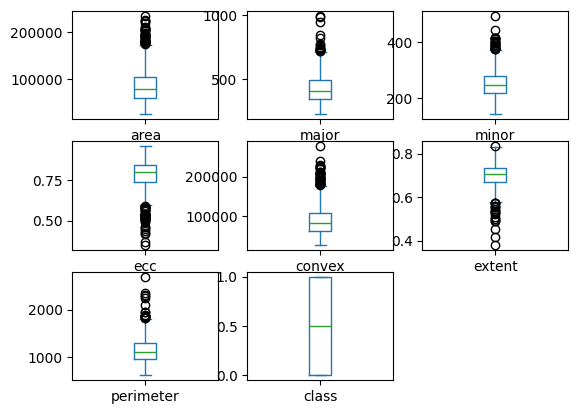

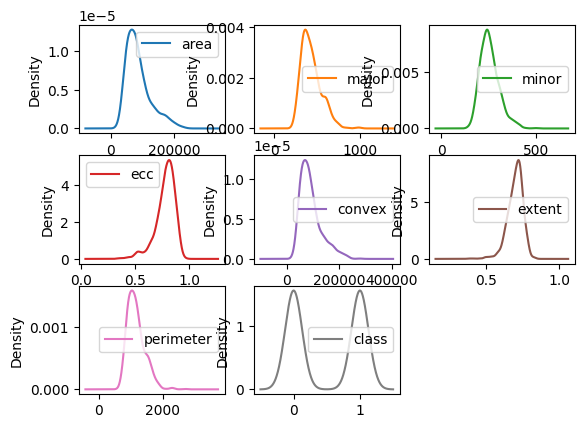

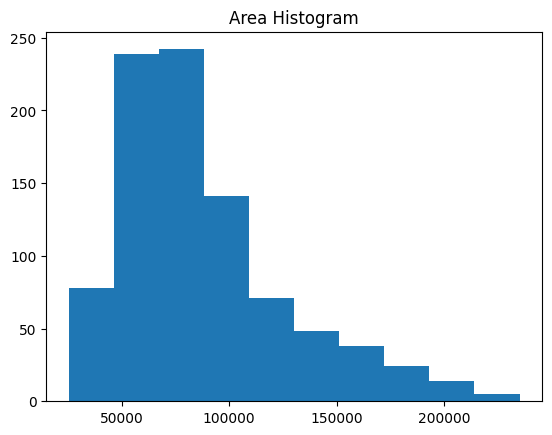

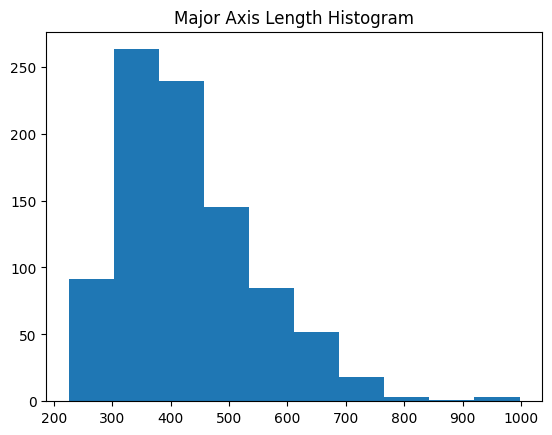

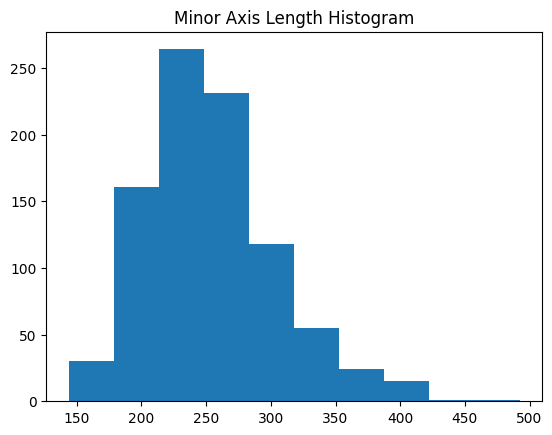

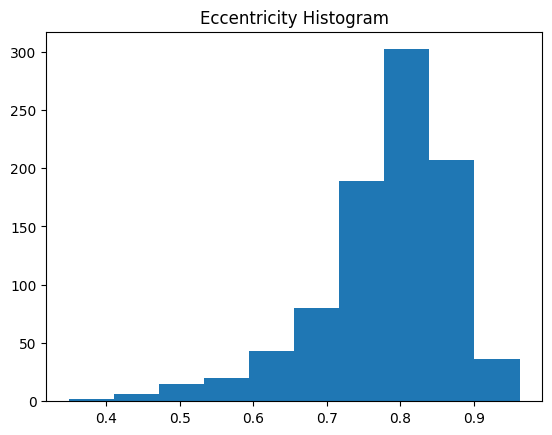

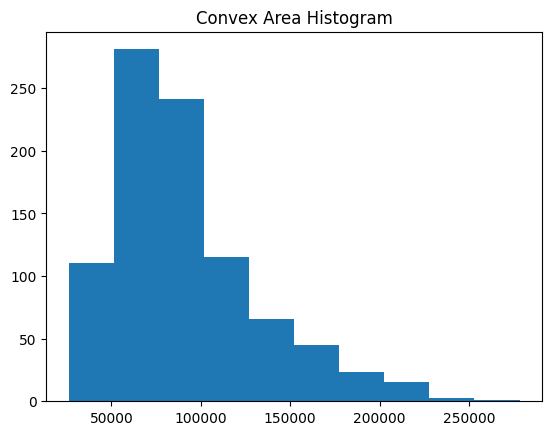

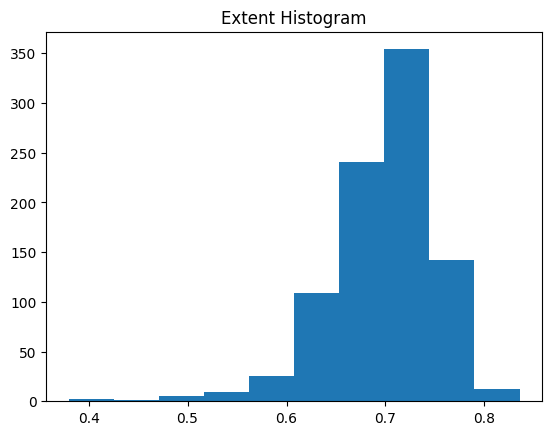

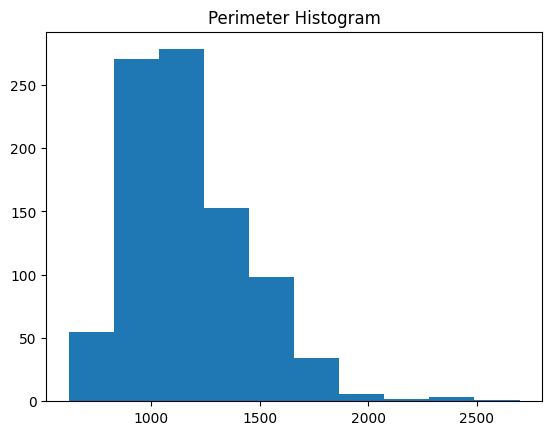

In [35]:
# ----DATA PLOTS----

# Box Plot
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

# Density Curve
dataset.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)
plt.title("Data Density Before Cleaning")
plt.show()


# Histograms
# Area Histogram
x = dataset['area']
plt.hist(x)
plt.title("Area Histogram")
plt.show()
# Major Axis Length Histogram
x = dataset['major']
plt.hist(x)
plt.title("Major Axis Length Histogram")
plt.show()
# Minor Axis Length Histogram
x = dataset['minor']
plt.hist(x)
plt.title("Minor Axis Length Histogram")
plt.show()
# Eccentricity Histogram
x = dataset['ecc']
plt.hist(x)
plt.title("Eccentricity Histogram")
plt.show()
# ConvexArea Histogram
x = dataset['convex']
plt.hist(x)
plt.title("Convex Area Histogram")
plt.show()
# Extent Histogram
x = dataset['extent']
plt.hist(x)
plt.title("Extent Histogram")
plt.show()
# Perimeter Histogram
x = dataset['perimeter']
plt.hist(x)
plt.title("Perimeter Histogram")
plt.show()

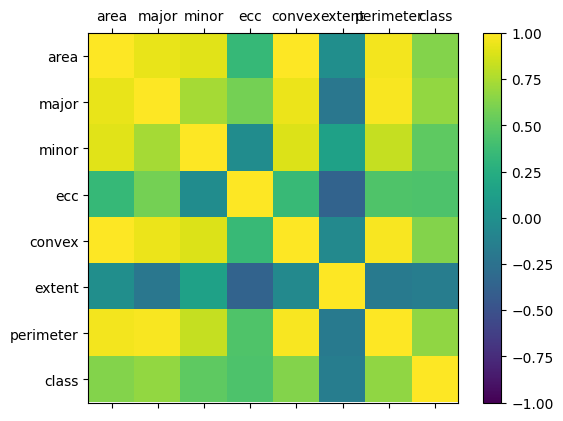

In [36]:

# Correlation Matrix
correlations = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [37]:
# ----Clean the Data----
threshold_z = 3
outlier_indices = []
for col in dataset:
    if col != "class":
        z = np.abs(stats.zscore(dataset[col]))
        outlier_indices_col = np.where(z > threshold_z)[0]
        outlier_indices.extend(outlier_indices_col)
print(outlier_indices)
dataset = dataset.drop(outlier_indices)
print(dataset.describe())

[487, 507, 552, 580, 581, 668, 708, 804, 812, 866, 880, 85, 487, 506, 694, 836, 490, 552, 581, 616, 769, 804, 880, 13, 23, 34, 43, 106, 156, 192, 197, 235, 251, 253, 316, 356, 483, 880, 85, 487, 506, 694, 708, 804, 812, 836, 866, 880, 85, 290, 459, 487, 498, 506, 536, 579, 682, 694, 802, 829, 836, 85, 290, 487, 506, 694, 836]
                area       major       minor         ecc         convex  \
count     860.000000  860.000000  860.000000  860.000000     860.000000   
mean    85689.111628  425.399183  251.839739    0.785030   88762.722093   
std     35714.789417  105.363100   46.579123    0.079252   36697.834521   
min     25387.000000  225.629541  143.710872    0.517135   26139.000000   
25%     59230.500000  345.829099  218.450742    0.744472   61489.250000   
50%     78122.500000  405.796609  246.643156    0.798846   80835.500000   
75%    103121.000000  486.582391  277.440665    0.840973  107340.500000   
max    204226.000000  769.425149  403.719328    0.928094  209580.000000 

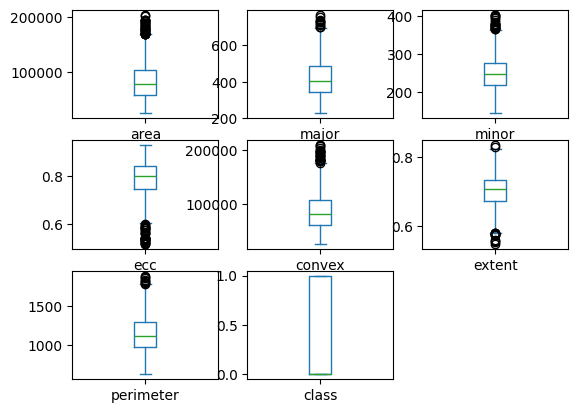

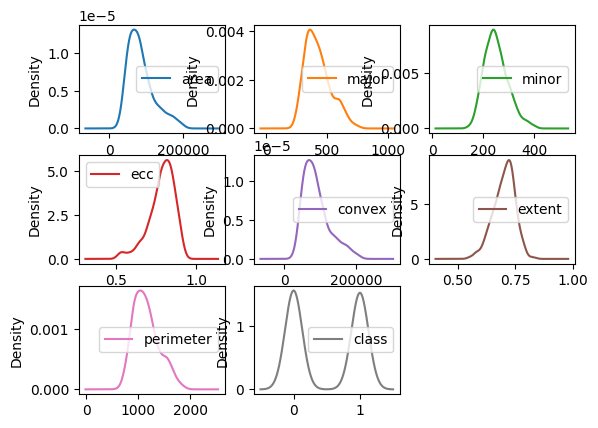

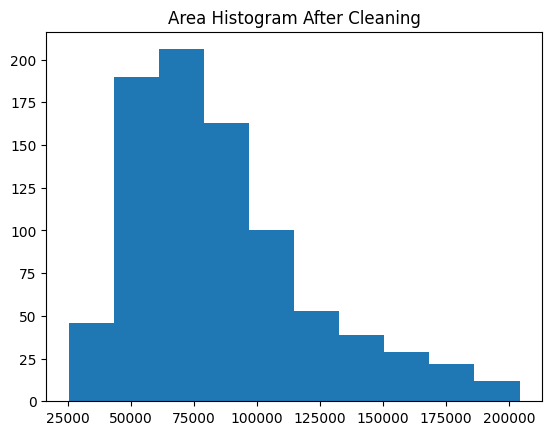

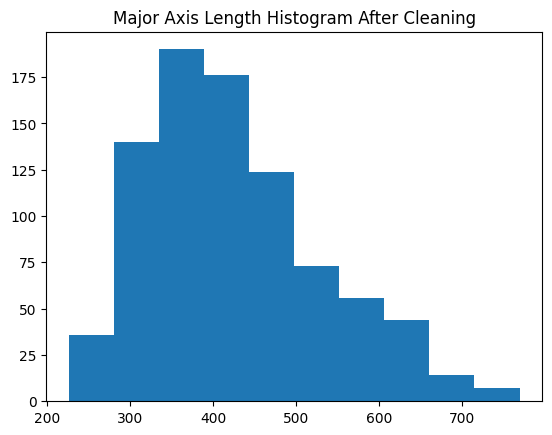

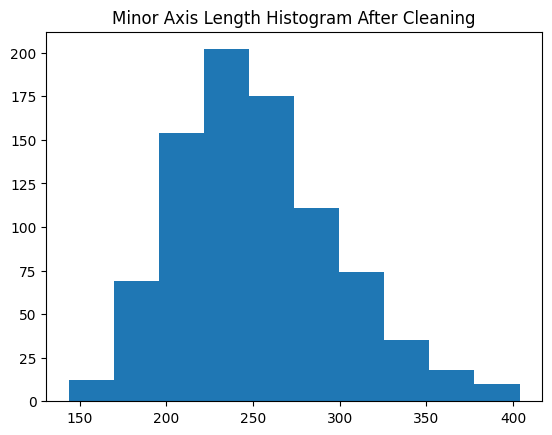

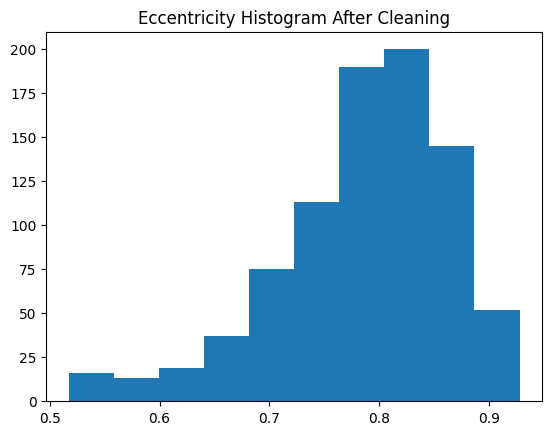

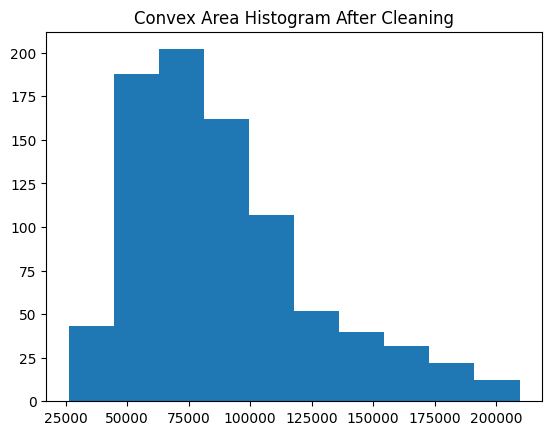

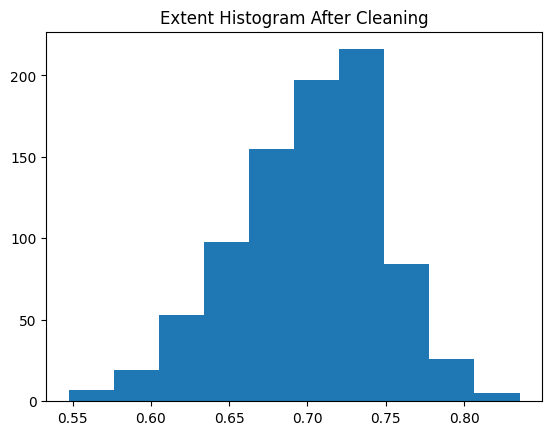

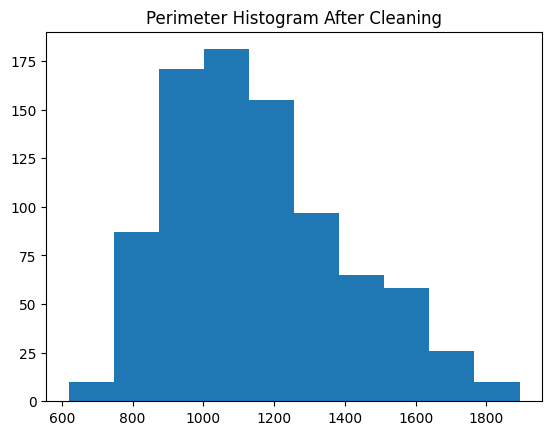

In [38]:
# ----DATA PLOTS AFTER CLEANING----

# Box Plot
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()



# Density Plot
dataset.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)
plt.title("Data Density After Cleaning")
plt.show()


# Histograms
# Area Histogram
x = dataset['area']
plt.hist(x)
plt.title("Area Histogram After Cleaning")
plt.show()
# Major Axis Length Histogram
x = dataset['major']
plt.hist(x)
plt.title("Major Axis Length Histogram After Cleaning")
plt.show()
# Minor Axis Length Histogram
x = dataset['minor']
plt.hist(x)
plt.title("Minor Axis Length Histogram After Cleaning")
plt.show()
# Eccentricity Histogram
x = dataset['ecc']
plt.hist(x)
plt.title("Eccentricity Histogram After Cleaning")
plt.show()
# ConvexArea Histogram
x = dataset['convex']
plt.hist(x)
plt.title("Convex Area Histogram After Cleaning")
plt.show()
# Extent Histogram
x = dataset['extent']
plt.hist(x)
plt.title("Extent Histogram After Cleaning")
plt.show()
# Perimeter Histogram
x = dataset['perimeter']
plt.hist(x)
plt.title("Perimeter Histogram After Cleaning")
plt.show()

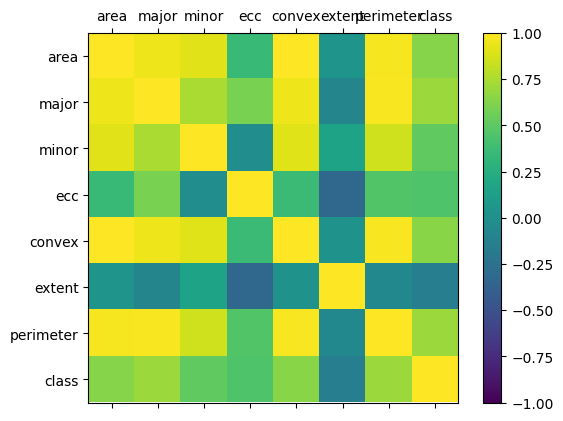

In [39]:
# Correlation Matrix
correlations = dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
